# Oversampling and Undersampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Problem

When one class (say “fraudulent transactions”) has very few samples compared to another class (say “normal transactions”), a model may just predict the majority class most of the time — and still look like it’s doing well.
That’s why we need resampling techniques like oversampling and undersampling.

### 1. Oversampling
   
- Oversampling = add more data to the minority class (the smaller one).
- The simplest way: duplicate existing samples of the minority class until both classes are balanced.
- Smarter way: create synthetic samples (like SMOTE – Synthetic Minority Oversampling Technique, which makes “new” but similar examples).
  
Effect:
- The dataset grows bigger.
- The model gets more chances to “see” the minority class.
- Risk: It may overfit if we just keep duplicating the same samples.

### 2. Undersampling
  
- Undersampling = remove data from the majority class (the bigger one).
- Randomly throw away samples from the majority class until both classes are balanced.
- Or do it in a smarter way (like keeping only the most informative samples).
  
Effect:
- The dataset gets smaller.
- Training is faster.
- Risk: You may lose useful information because you’re discarding data.


## SMOTE
 
(Synthetic Minority Oversampling Technique)

- Instead of just duplicating minority samples, it creates new, synthetic samples that are similar but not identical to existing ones.
- This helps the model learn a more general decision boundary instead of memorizing duplicates.

### How SMOTE Works:
  
a. Pick a minority class sample (say a fraud transaction).
  
b. Find its k nearest neighbors (other minority samples nearby, usually k=5).
  
c. Randomly choose one neighbor from those k.
  
d. Create a synthetic sample somewhere between the original point and the chosen neighbor.

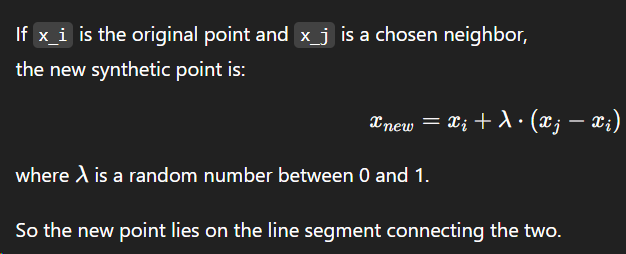

### Drawback: 
- If an outlier minority point is chosen, SMOTE will happily generate synthetic points between that outlier and its neighbors. 
- This can create noisy synthetic samples in regions where they don’t really belong which can confuse the classifier and sometimes even make class overlap worse.

## Borderline SMOTE:

- Borderline-SMOTE is a smarter version of SMOTE.
Instead of generating synthetic points everywhere for the minority class, it focuses only on the “dangerous” samples — those that lie near the decision boundary (where majority and minority overlap).

- Why?
  
  Because points deep inside the minority region don’t really need reinforcement as the classifier already sees them clearly.
  
The real challenge is around the “borderline,” where the model can get confused.

### How Borderline-SMOTE Works
1) For each minority sample, look at its k nearest neighbors (mixture of minority + majority).
2) Count how many of those neighbors belong to the majority class.
3) Classify the minority sample into one of three categories:
4) Safe → most neighbors are minority (well-protected).
5) Danger → many neighbors are majority (surrounded, but not completely).
6) Noise → all neighbors are majority (likely an outlier).
7) Generate synthetic samples only for the “danger” points.

### How are “Danger Points” determined?
  
A minority sample is in danger if:
- At least half of its neighbors are majority class, but not all of them (otherwise it would be labeled noise).

So if k=5:
- 0 or 1 majority neighbors → Safe.
- 2, 3, or 4 majority neighbors → Danger.
- 5 majority neighbors → Noise.

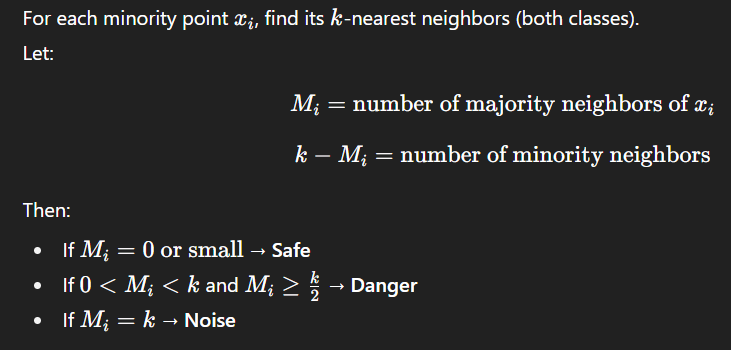

## Drawbacks:
1) Still sensitive to outliers near the boundary. If an “outlier” minority sample happens to lie near majority points, Borderline-SMOTE may classify it as danger and generate synthetic points around it. This spreads the outlier problem instead of fixing it.

2) Doesn’t address class overlap fully. If the minority and majority classes overlap heavily, Borderline-SMOTE will still generate synthetic points in those overlapping regions. This can blur the boundary instead of sharpening it.

3) Relies on k-nearest neighbors choice
- If k is too small → labeling (safe/danger/noise) may be noisy.
- If k is too large → it may misclassify borderline points as safe or noise.
- So the performance is sensitive to the parameter 𝑘.

4) Bias toward borderline density
- It focuses only on danger points.
- But sometimes safe minority points still need reinforcement (e.g., when there’s imbalance inside clusters). Borderline-SMOTE ignores them.

## ADASYN
(Adaptive Syntheic Sampling Approach)
- Instead of generating synthetic samples evenly, ADASYN generates more new points where the minority class is hardest to learn (i.e., near the majority).
- So the algorithm “focuses” on difficult regions and doesn’t waste effort on safe zones.

### Method:
1) Compute local difficulty for each minority sample
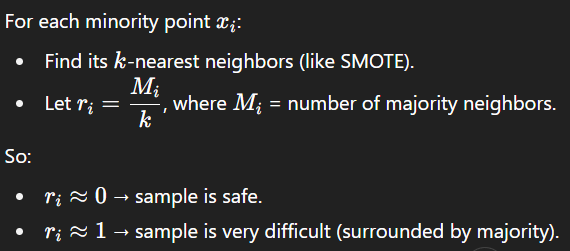



In [ ]:

print("Hello World")

Hello World
